#Problem Statement
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Building a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Importing dataset
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
#Their are 614 rows and 13 columns in dataset

In [5]:
#for displaying max. rows
pd.set_option('display.max_rows', None)

In [6]:
# checking Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#checking datatype
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#Three types of data type present in dataset. 1. integer, 2. object, 3. float

In [9]:
# droping col.
del df['Loan_ID']

In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

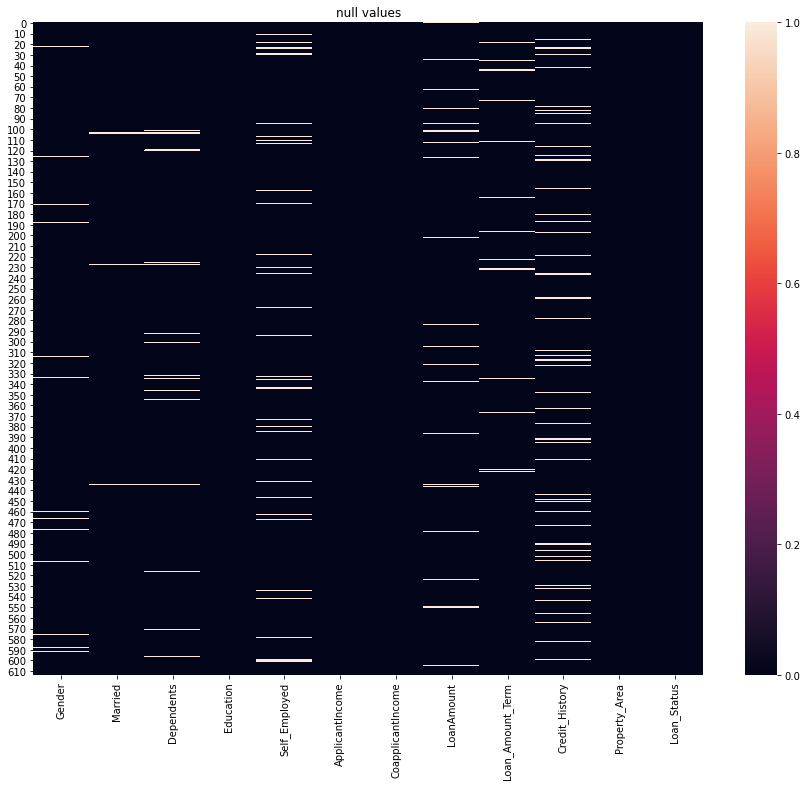

In [11]:
#Heatmap for checking null values
plt.figure(figsize = [15,12])
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

In [12]:
# for checking for null values- null values is observed in dataset as whitelines are visible in map, need to fill them for better model buliding

In [13]:
#filling null values using mode
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
print(df["Dependents"])

0       0
1       1
2       0
3       0
4       0
5       2
6       0
7      3+
8       2
9       1
10      2
11      2
12      2
13      0
14      2
15      0
16      1
17      0
18      0
19      0
20      0
21      1
22      0
23      2
24      1
25      0
26      0
27      2
28      0
29      2
30      1
31      0
32      1
33      0
34     3+
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      1
47      0
48      0
49      0
50      0
51      0
52      0
53      2
54      1
55      2
56      0
57      0
58      1
59      2
60      0
61     3+
62      0
63      1
64      0
65      0
66      0
67      1
68     3+
69      0
70      0
71      2
72      0
73     3+
74     3+
75      0
76      0
77      1
78     3+
79     3+
80      0
81      1
82      2
83      0
84      1
85      0
86      2
87      0
88      0
89      0
90      0
91      2
92      2
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [14]:
#filling null values using mode
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
print(df["Married"])

0       No
1      Yes
2      Yes
3      Yes
4       No
5      Yes
6      Yes
7      Yes
8      Yes
9      Yes
10     Yes
11     Yes
12     Yes
13      No
14     Yes
15      No
16      No
17      No
18     Yes
19     Yes
20     Yes
21     Yes
22     Yes
23     Yes
24     Yes
25     Yes
26     Yes
27     Yes
28      No
29      No
30     Yes
31      No
32      No
33     Yes
34      No
35     Yes
36     Yes
37     Yes
38      No
39      No
40      No
41      No
42     Yes
43     Yes
44     Yes
45      No
46     Yes
47     Yes
48     Yes
49      No
50     Yes
51      No
52      No
53     Yes
54     Yes
55     Yes
56     Yes
57     Yes
58     Yes
59     Yes
60     Yes
61     Yes
62     Yes
63     Yes
64      No
65     Yes
66      No
67     Yes
68     Yes
69      No
70     Yes
71     Yes
72      No
73     Yes
74     Yes
75      No
76      No
77     Yes
78     Yes
79     Yes
80      No
81     Yes
82     Yes
83     Yes
84     Yes
85      No
86     Yes
87     Yes
88      No
89     Yes
90     Yes

In [15]:
#filling null values using mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
print(df["Gender"])

0        Male
1        Male
2        Male
3        Male
4        Male
5        Male
6        Male
7        Male
8        Male
9        Male
10       Male
11       Male
12       Male
13       Male
14       Male
15       Male
16       Male
17     Female
18       Male
19       Male
20       Male
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
30       Male
31       Male
32       Male
33       Male
34       Male
35       Male
36       Male
37     Female
38       Male
39       Male
40       Male
41       Male
42       Male
43       Male
44       Male
45     Female
46       Male
47       Male
48     Female
49     Female
50     Female
51     Female
52     Female
53       Male
54     Female
55       Male
56       Male
57       Male
58       Male
59       Male
60       Male
61       Male
62       Male
63       Male
64     Female
65       Male
66       Male
67       Male
68       Male
69     Female
70       Male
71    

In [16]:
#filling null values using mode
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
print(df["Self_Employed"])

0       No
1       No
2      Yes
3       No
4       No
5      Yes
6       No
7       No
8       No
9       No
10      No
11      No
12      No
13      No
14      No
15      No
16      No
17      No
18      No
19      No
20      No
21      No
22      No
23      No
24      No
25     Yes
26      No
27      No
28      No
29      No
30      No
31      No
32     Yes
33      No
34      No
35      No
36      No
37      No
38      No
39      No
40      No
41      No
42      No
43      No
44     Yes
45      No
46      No
47      No
48      No
49      No
50      No
51      No
52      No
53      No
54     Yes
55      No
56      No
57      No
58      No
59      No
60      No
61      No
62     Yes
63      No
64      No
65      No
66      No
67      No
68     Yes
69      No
70      No
71     Yes
72      No
73      No
74     Yes
75      No
76      No
77     Yes
78      No
79     Yes
80      No
81     Yes
82      No
83      No
84      No
85      No
86      No
87      No
88      No
89      No
90      No

In [17]:
#filling null values using mean values
df["LoanAmount"]=df["LoanAmount"].replace(np.NaN,df["LoanAmount"].mean())
print(df["LoanAmount"][:20])

0     146.412162
1     128.000000
2      66.000000
3     120.000000
4     141.000000
5     267.000000
6      95.000000
7     158.000000
8     168.000000
9     349.000000
10     70.000000
11    109.000000
12    200.000000
13    114.000000
14     17.000000
15    125.000000
16    100.000000
17     76.000000
18    133.000000
19    115.000000
Name: LoanAmount, dtype: float64


In [18]:
#filling null values using mean values
df["Loan_Amount_Term"]=df["LoanAmount"].replace(np.NaN,df["Loan_Amount_Term"].mean())
print(df["Loan_Amount_Term"][:20])

0     146.412162
1     128.000000
2      66.000000
3     120.000000
4     141.000000
5     267.000000
6      95.000000
7     158.000000
8     168.000000
9     349.000000
10     70.000000
11    109.000000
12    200.000000
13    114.000000
14     17.000000
15    125.000000
16    100.000000
17     76.000000
18    133.000000
19    115.000000
Name: Loan_Amount_Term, dtype: float64


In [19]:
#filling null values using mean values
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.NaN,df["Loan_Amount_Term"].mean())
print(df["Loan_Amount_Term"][:20])

0     146.412162
1     128.000000
2      66.000000
3     120.000000
4     141.000000
5     267.000000
6      95.000000
7     158.000000
8     168.000000
9     349.000000
10     70.000000
11    109.000000
12    200.000000
13    114.000000
14     17.000000
15    125.000000
16    100.000000
17     76.000000
18    133.000000
19    115.000000
Name: Loan_Amount_Term, dtype: float64


In [20]:
#filling null values using mean values
df["Credit_History"]=df["Credit_History"].replace(np.NaN,df["Credit_History"].mean())
print(df["Credit_History"][:20])

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.000000
6     1.000000
7     0.000000
8     1.000000
9     1.000000
10    1.000000
11    1.000000
12    1.000000
13    1.000000
14    1.000000
15    1.000000
16    0.842199
17    0.000000
18    1.000000
19    1.000000
Name: Credit_History, dtype: float64


In [21]:
#again checking for null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
#Converting object type data into integers
encode = LabelEncoder() 
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [23]:
#checking again dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [24]:
#multivariate analysis
corr_mat=df.corr()
corr_mat

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,0.107930,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,0.147141,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,0.163106,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.166998,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,0.115260,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,0.565620,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,0.187828,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,1.000000,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,1.000000,-0.007738,-0.044776,-0.036416
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,-0.007738,1.000000,-0.001880,0.540483


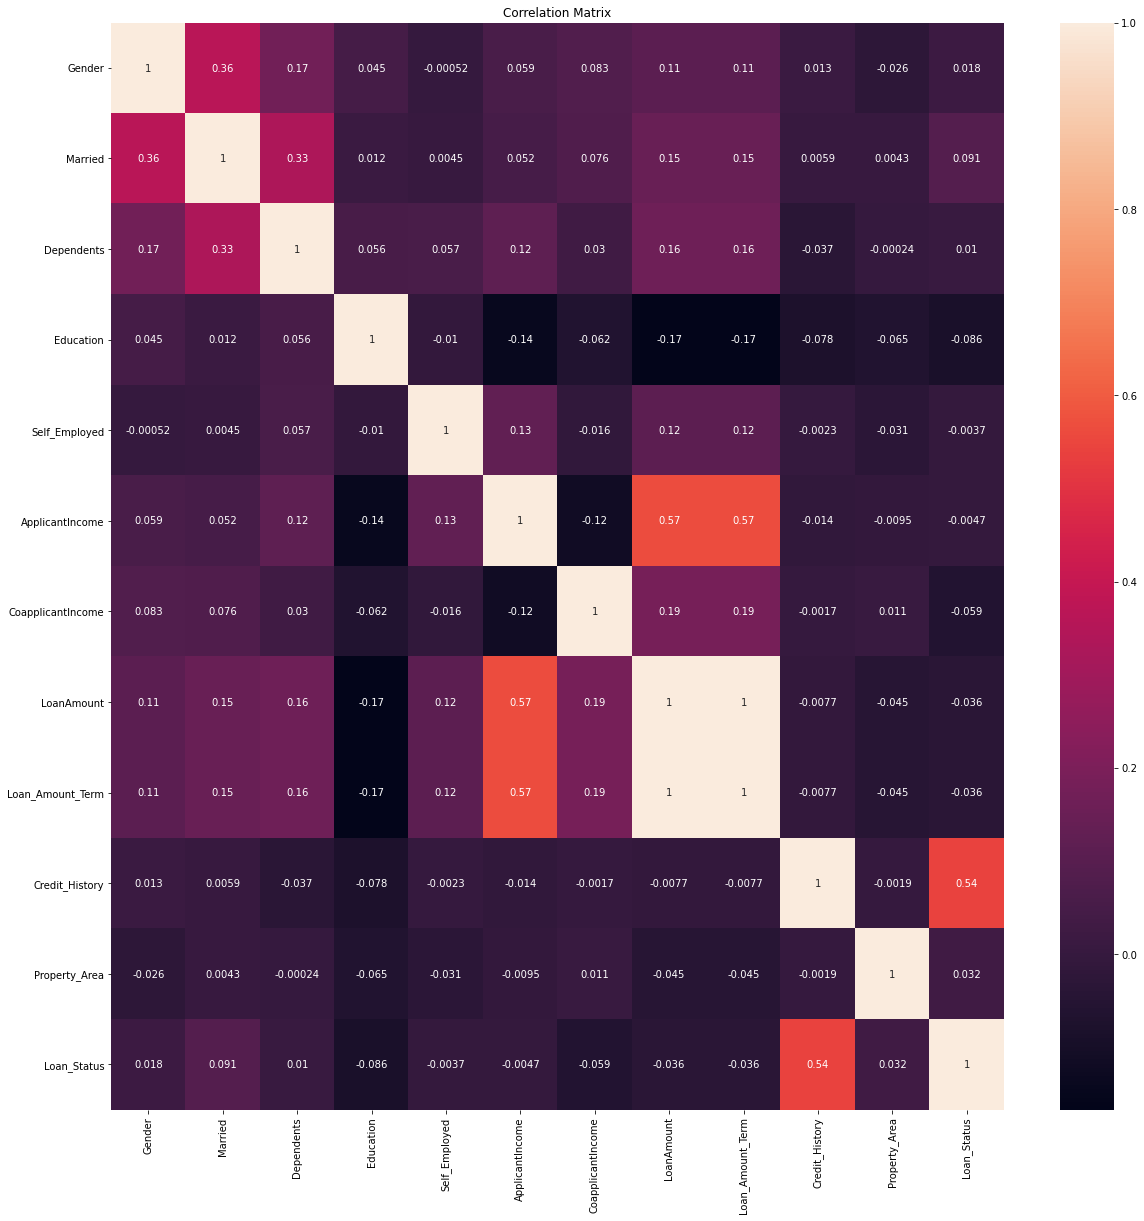

In [25]:
# heatmap for analysing correlation
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [26]:
#for better understanding correalation with target col.
corr_mat=df.corr()
corr_mat["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
LoanAmount          -0.036416
Loan_Amount_Term    -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [27]:
# 5 columns shown +ve correlation with Target column, whereas highest correaltion is 0.561678 of Credit_History.
# six columns i.e.Fnlwgt,Marital_status,Relationship shown -ve correlation with target column.

<function matplotlib.pyplot.show(close=None, block=None)>

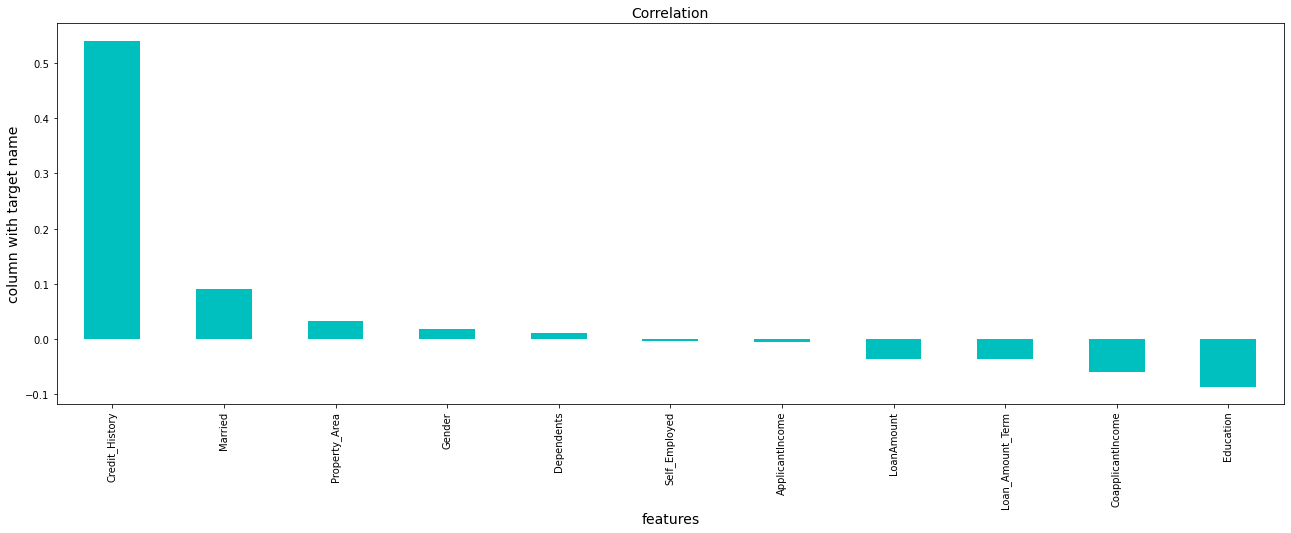

In [28]:
#plotting graph showing +ve and -ve correlation of coloumns
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('features', fontsize=14)
plt.ylabel('column with target name', fontsize=14)
plt.title('Correlation', fontsize=14)
plt.show

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>],
       [<AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

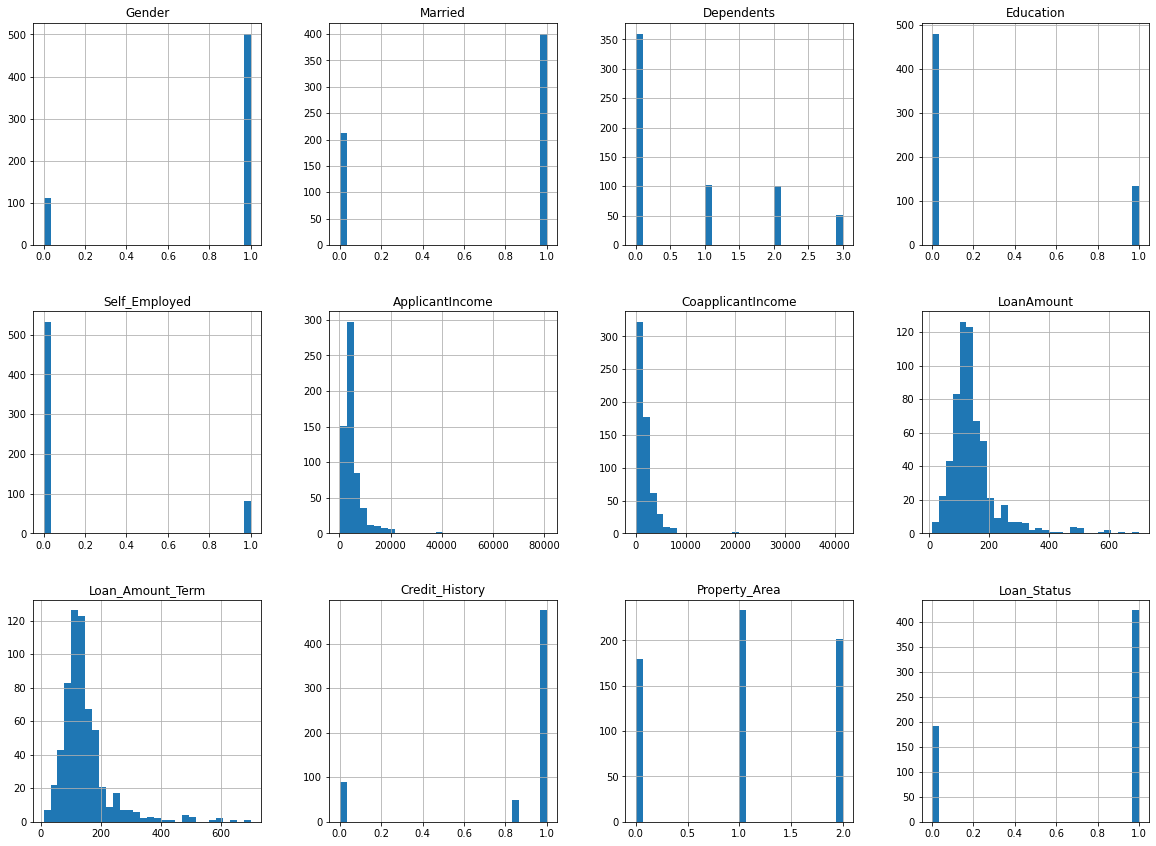

In [29]:
#plotting histogram for checking distribution
df.hist(figsize=(20, 20), grid=True, layout=(4,4),bins=30)

In [30]:
#describing dataset
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,146.412162,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,84.037468,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,9.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,100.250000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,129.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,164.750000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,700.000000,1.000000,2.000000,1.000000


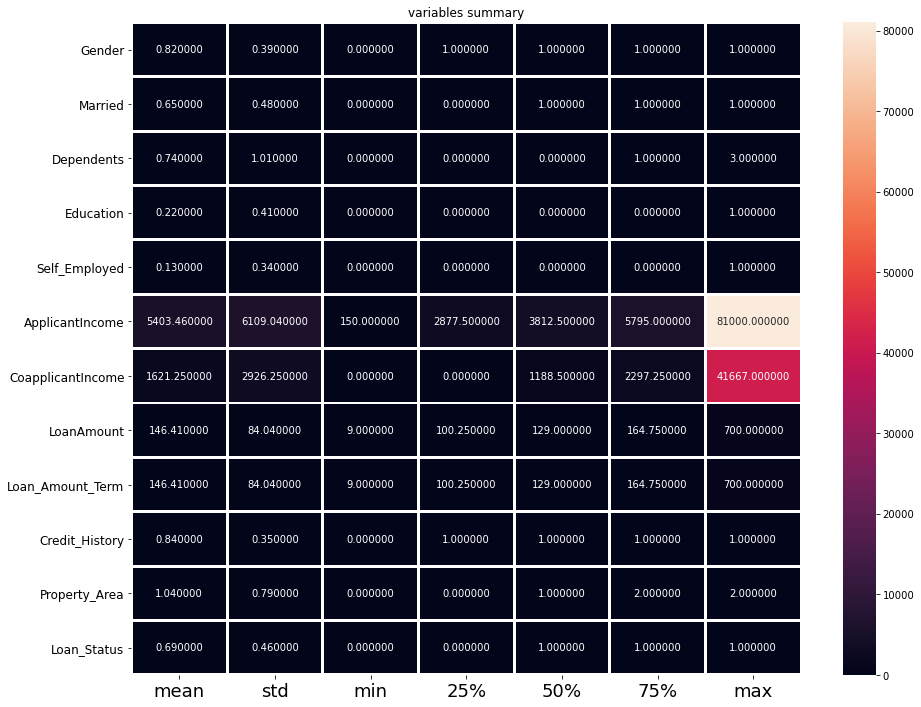

In [31]:
#plotting histogram for df.describe dataset
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variables summary")
plt.show()

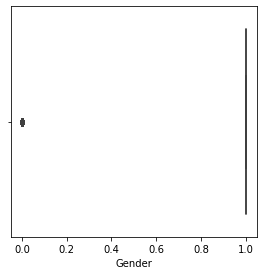

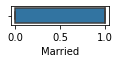

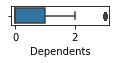

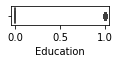

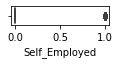

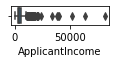

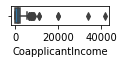

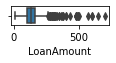

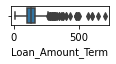

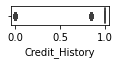

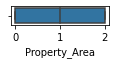

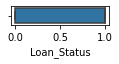

In [32]:
#checking outliers
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column], orient='v')
        plt.xlabel(column, fontsize=10)
    graph+=1
    plt.show()

In [33]:
#outliers is present in many columns, need to remove outliers

In [34]:
#removing outliers using z-score method
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [35]:
print("shape before and after")
print("shape before.ljust(20)",";",df.shape)
print("shape after.ljust(20)",";",df_new.shape)
print("Percentage Loss".ljust(20),";",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before.ljust(20) ; (614, 12)
shape after.ljust(20) ; (589, 12)
Percentage Loss      ; 0.04071661237785016


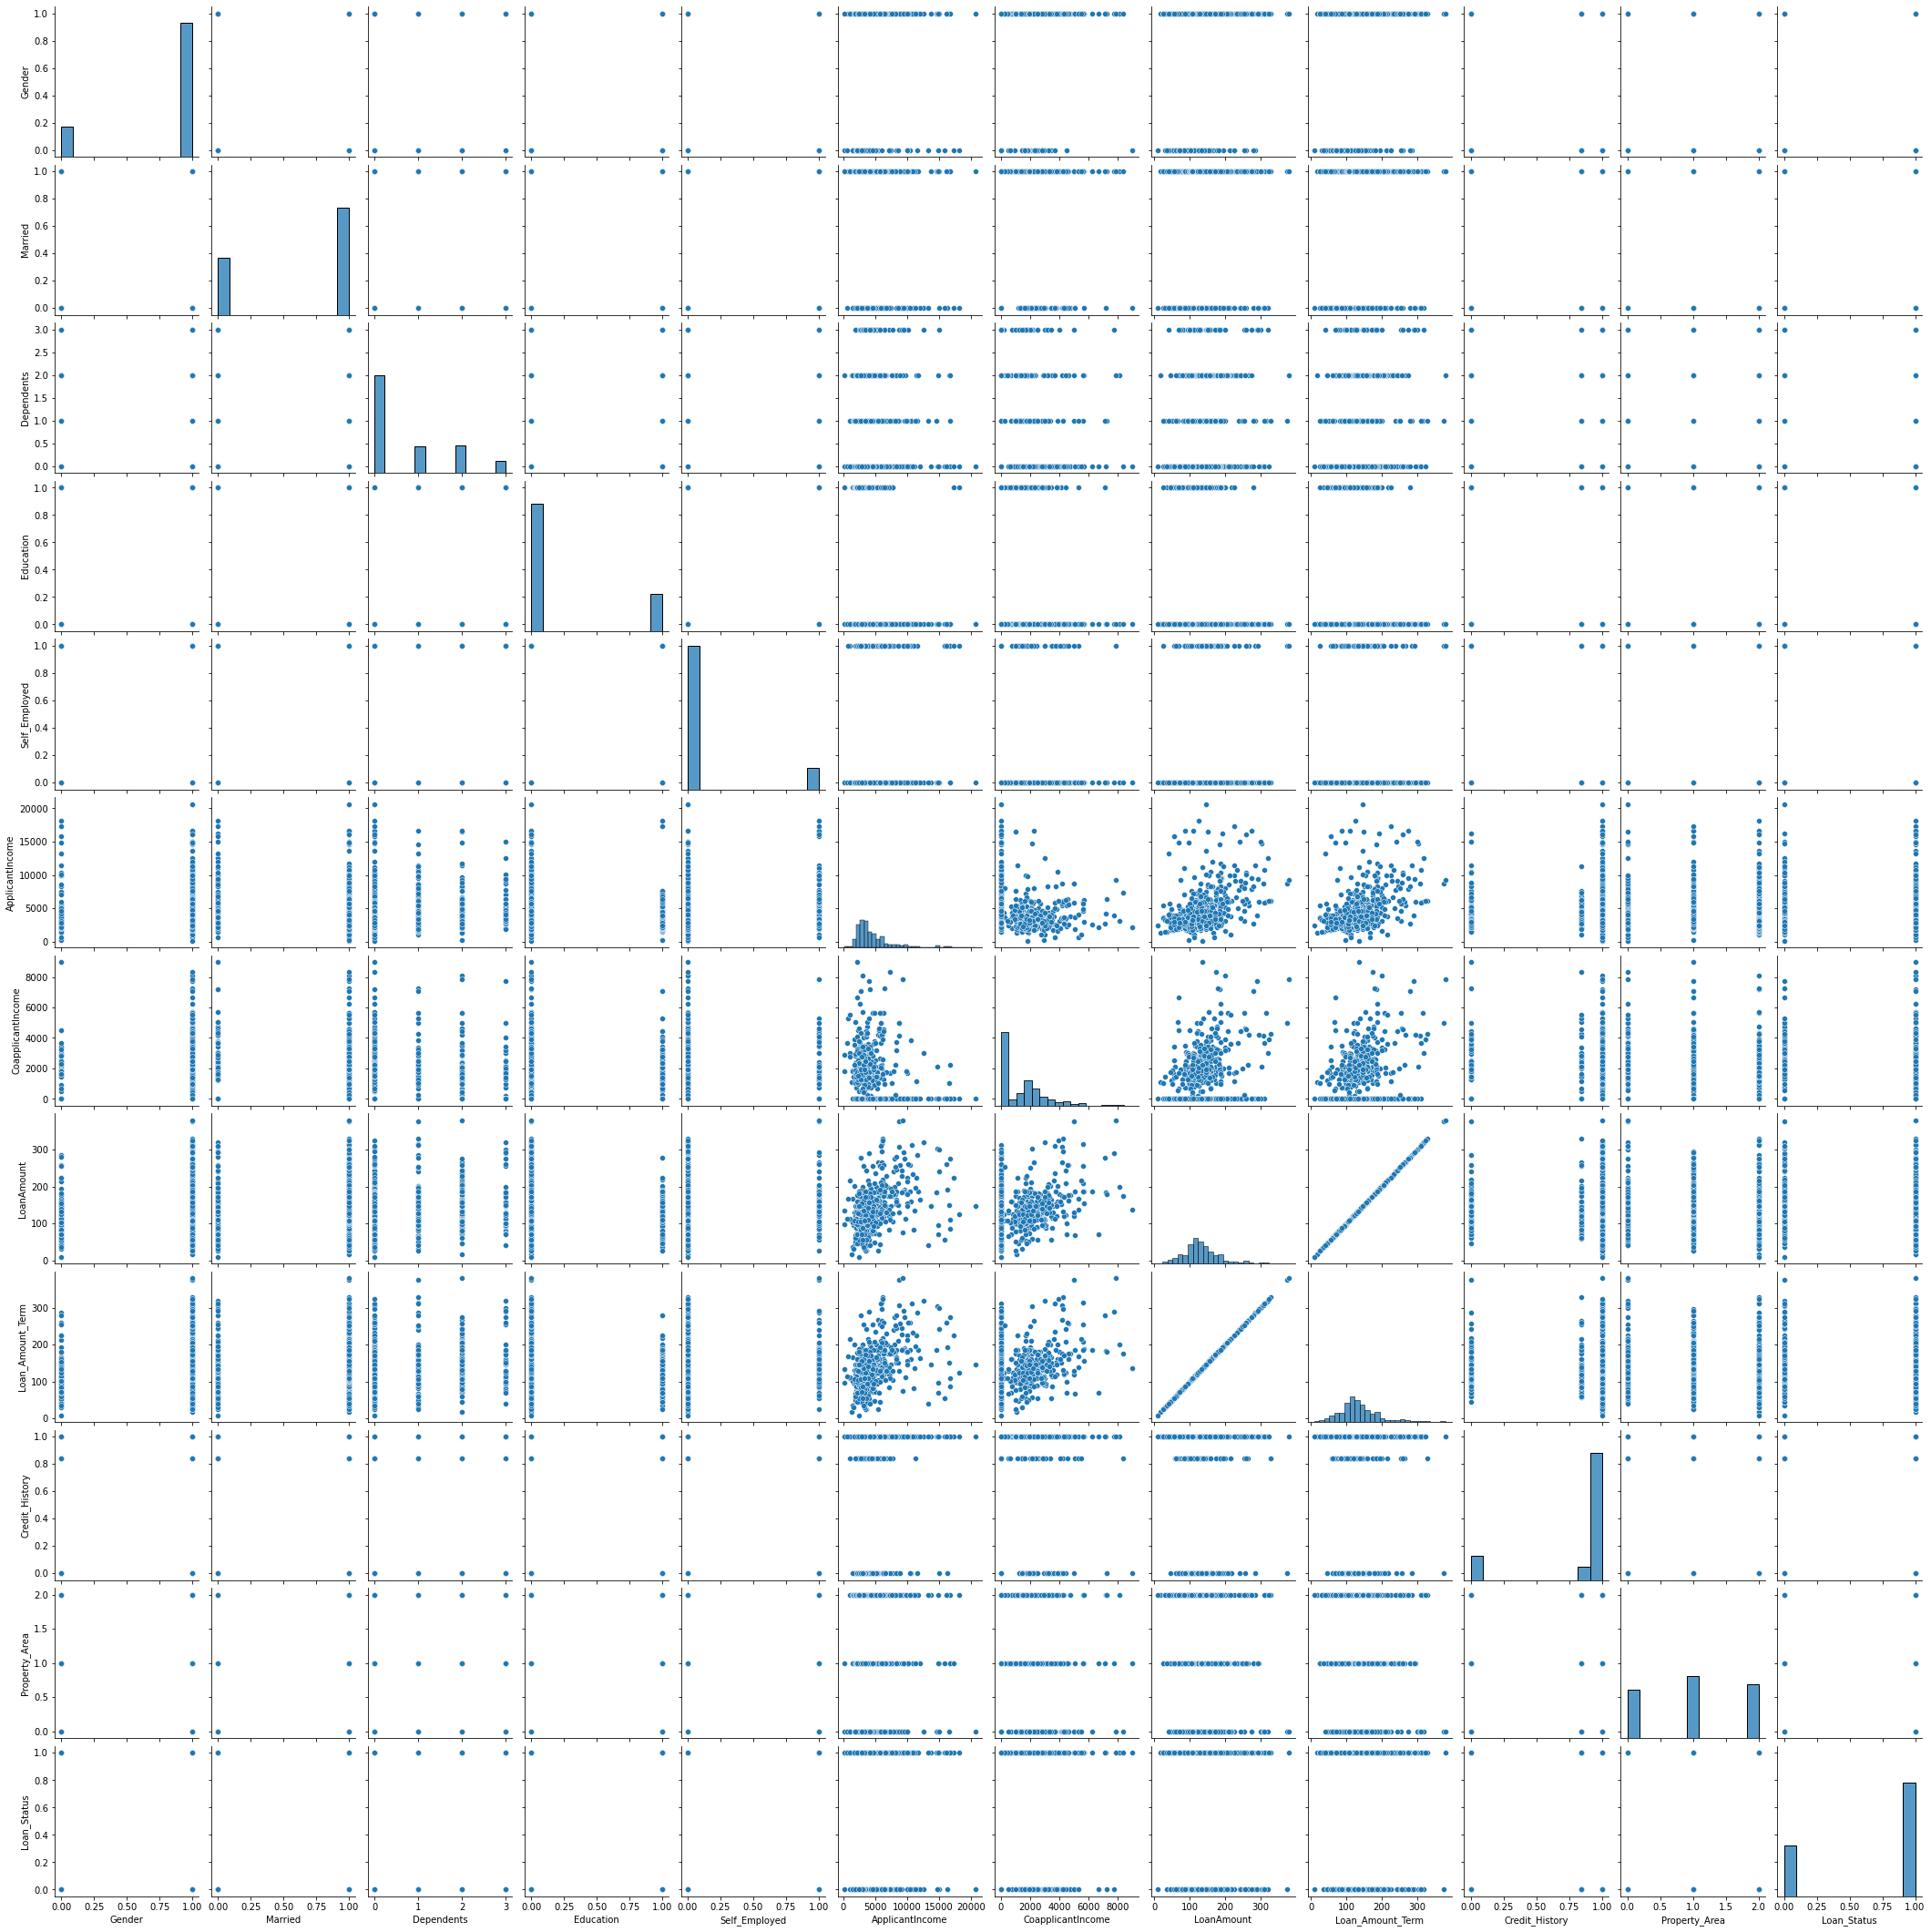

In [36]:
#plotting for seeing relation between columns-using pairplot
sns.pairplot(df_new)
plt.show()

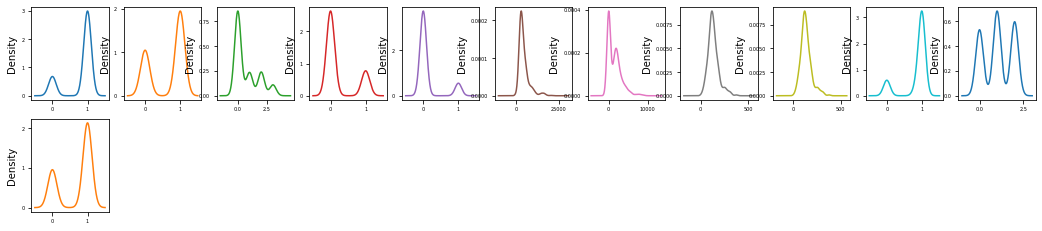

In [37]:
#check distribution for all the colunms
df_new.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=5,figsize=(18,12))
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

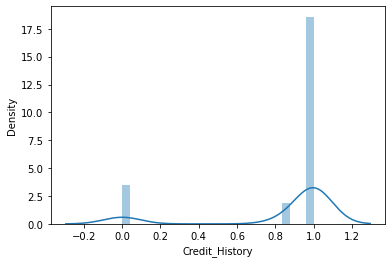

In [38]:
#checking distribution for cols.
sns.distplot(df_new["Credit_History"])  

In [39]:
#checking col. names
df_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
#splitting data
x=df_new.drop("Loan_Status", axis=1)
y=df_new["Loan_Status"]

In [52]:
x.skew()

Gender              -1.626104
Married             -0.631755
Dependents           1.038787
Education            1.303332
Self_Employed        2.218831
ApplicantIncome      2.164762
CoapplicantIncome    1.353191
LoanAmount           1.076221
Loan_Amount_Term     1.076221
Credit_History      -1.953298
Property_Area       -0.063183
dtype: float64

In [42]:
#columns showing skewness need to remove for better model building

In [53]:
# remove skewness
from sklearn.preprocessing import power_transform
import pandas as pd
df1_new = power_transform(df_new.iloc[:,:-1])
df1_new = pd.DataFrame(df1_new)

In [55]:
#target col. analysis
df_new["Loan_Status"].value_counts()

1    407
0    182
Name: Loan_Status, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

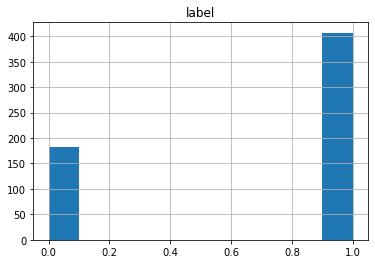

In [56]:
#univariate analysis
df_new["Loan_Status"].hist(grid=True)
plt.title('label')
plt.show

In [57]:
#splitling into tRain and test
from sklearn.model_selection import train_test_split

In [58]:
#Handling Imbalance by oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over, y_over = SM.fit_resample(x,y)

In [59]:
#again checking target col.
y_over.value_counts()

0    407
1    407
Name: Loan_Status, dtype: int64

In [60]:
#scaling data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [61]:
#finding best random State
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc= accuracy_score(y_test, predf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best accuracy is", maxAcc, "on Random_state", maxRS)

Best accuracy is 0.8851351351351351 on Random_state 31


In [62]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=31)

In [63]:
#model building-Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
prelr = LR.predict(x_test)
print(accuracy_score(y_test,prelr))
print(confusion_matrix(y_test,prelr))
print(classification_report(y_test,prelr))

0.8700564971751412
[[ 26  23]
 [  0 128]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        49
           1       0.85      1.00      0.92       128

    accuracy                           0.87       177
   macro avg       0.92      0.77      0.81       177
weighted avg       0.89      0.87      0.86       177



In [64]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6779661016949152
[[34 15]
 [42 86]]
              precision    recall  f1-score   support

           0       0.45      0.69      0.54        49
           1       0.85      0.67      0.75       128

    accuracy                           0.68       177
   macro avg       0.65      0.68      0.65       177
weighted avg       0.74      0.68      0.69       177



In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8587570621468926
[[ 30  19]
 [  6 122]]
              precision    recall  f1-score   support

           0       0.83      0.61      0.71        49
           1       0.87      0.95      0.91       128

    accuracy                           0.86       177
   macro avg       0.85      0.78      0.81       177
weighted avg       0.86      0.86      0.85       177



In [66]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6779661016949152
[[34 15]
 [42 86]]
              precision    recall  f1-score   support

           0       0.45      0.69      0.54        49
           1       0.85      0.67      0.75       128

    accuracy                           0.68       177
   macro avg       0.65      0.68      0.65       177
weighted avg       0.74      0.68      0.69       177



In [67]:
#for validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR, x, y, cv=3)
print("Cross validation score of LogisticRegression model :", scr.mean())

Cross validation score of LogisticRegression model : 0.8132618529645361


In [68]:
scr=cross_val_score(dt, x, y, cv=3)
print("Cross validation score of DecisionTree model :", scr.mean())

Cross validation score of DecisionTree model : 0.7011809800062156


In [69]:
scr=cross_val_score(rf, x, y, cv=3)
print("Cross validation score of RandomForest model :", scr.mean())

Cross validation score of RandomForest model : 0.7979643634103387


In [70]:
scr=cross_val_score(svc, x, y, cv=3)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.8166459477191892


In [71]:
#Best model Hypertunning
from sklearn.model_selection import GridSearchCV

In [72]:
#Decisiontree Classifier
parameters = {'splitter' :['best', 'random'],
            'max_features': ['auto', 'sqrt','log2'],
            'max_depth': [4,5,6,7,8],
            'criterion': ['gini', 'entropy']}

In [73]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameters,cv=3)

In [74]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [75]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'random'}

In [77]:
mod=DecisionTreeClassifier(criterion='gini', max_depth=7, max_features='log2', splitter= 'random')

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.4406779661017


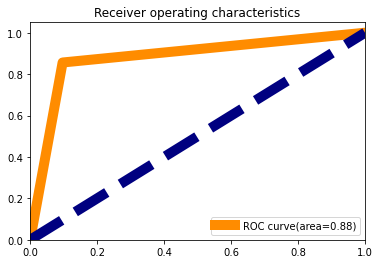

In [78]:
#AUC_ROC Curve
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=10,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#getting ROC curve area 0.89, AUC score is 88%

In [79]:
#saving model
import joblib
joblib.dump(mod,"Loan prediction.pkl")

['Loan prediction.pkl']